In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

bike_df = pd.read_csv('dataset/bike_train.csv')
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
bike_df.temp.unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [4]:
bike_df.atemp.unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

In [5]:
bike_df.holiday.unique()

array([0, 1], dtype=int64)

In [6]:
from datetime import date
# 문자열을 datetime 타입으로 변경하기

# datetime 타입에서 년, 월, 일, 시간 추출

bike_df['datetime'] = bike_df['datetime'].astype('datetime64[ns]')

In [7]:
bike_df['year'] = bike_df['datetime'].dt.year
bike_df['month'] = bike_df['datetime'].dt.month
bike_df['day'] = bike_df['datetime'].dt.day
bike_df['hour'] = bike_df['datetime'].dt.hour

In [8]:
# 선생님 답안)
# 문자열을 datetime 타입으로 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
# bike_df['year'] = bike_df.datetime.dt.year
bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)

In [9]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [10]:
# 선생님 답안) 평가를 위한 사용자 함수 생성

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE: {0:.4f}, RMSE: {1:.4f}, MAE: {2:.4f}'.format(rmsle_val,\
                                                               rmse_val, mae_val))

<AxesSubplot:xlabel='count', ylabel='Density'>

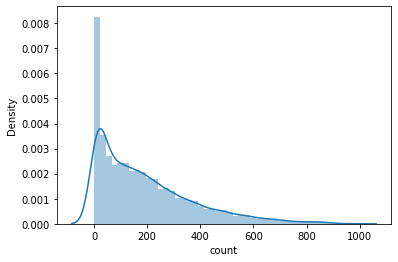

In [11]:
# 종속변수 정규성 개선을 위한 로그 변환

y_target = bike_df['count']
sns.distplot(y_target)

<AxesSubplot:xlabel='count', ylabel='Density'>

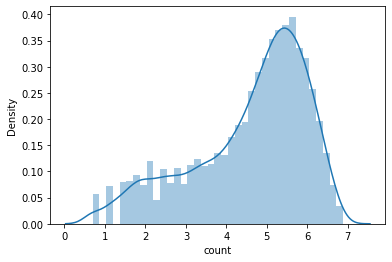

In [12]:
log_y = np.log1p(bike_df['count'])
sns.distplot(log_y)

In [13]:
# 모델링 및 평가
# 평가 지표: RMSLE, RMSE, MAE

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# casual + registerd => count이기 때문에 이 두 컬럼도 빼 준다.
bike_df.drop(['datetime','casual','registered'], axis=1, inplace=True)
X_features = bike_df.drop(['count'], axis=1)
y_target = bike_df['count']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,\
                                                    test_size = 0.3, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE: 1.1647, RMSE: 140.8996, MAE: 105.9244


In [14]:
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log,\
                                                   test_size = 0.3, random_state = 0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
evaluate_regr(y_test_exp, pred_exp)

# 테스트 시 로그변환을 했다가, 평가 시 환원을 빼먹고 수행하는 일이 없도록 주의하자.

RMSLE: 1.0168, RMSE: 162.5943, MAE: 109.2862


<AxesSubplot:>

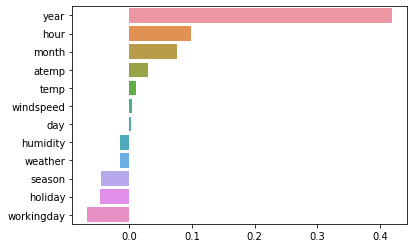

In [15]:
coef = pd.Series(lr_reg.coef_, index = X_features.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x = coef_sort.values, y = coef_sort.index)

# year는 2010 이상의 숫자이다 보니, 숫자의 크기가 평가에 반영되었을 가능성이 높다.

In [16]:
# [과제]

# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할

# model별로 평가 수행

# 회귀계수 중요도 시각화

# 회귀트리를 이용 해서 회귀 예측 수행

In [17]:
X_features.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [18]:
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day', 'hour', 'holiday',
                                                     'workingday', 'season', 'weather'])

In [19]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size = 0.3, random_state = 0)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print(model.__class__.__name__)
    evaluate_regr(y_test, pred)
    
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha = 10)
lasso_reg = Lasso(alpha = 0.01)
elastic_reg = ElasticNet(alpha = 0.01, l1_ratio = 0.001)

for model in [lr_reg, ridge_reg, lasso_reg, elastic_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = True)

LinearRegression
RMSLE: 0.5896, RMSE: 97.6878, MAE: 63.3821
Ridge
RMSLE: 0.5901, RMSE: 98.5286, MAE: 63.8934
Lasso
RMSLE: 0.6348, RMSE: 113.2188, MAE: 72.8027
ElasticNet
RMSLE: 0.6344, RMSE: 108.7106, MAE: 69.5983


<AxesSubplot:>

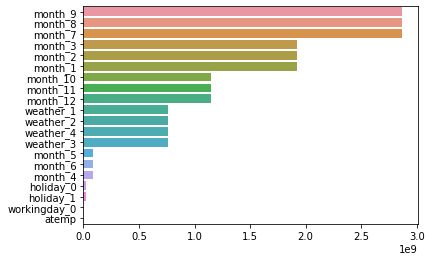

In [20]:
coef = pd.Series(lr_reg.coef_, index = X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [23]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators = 500)
gbm_reg = GradientBoostingRegressor(n_estimators = 500)
xgb_reg = XGBRegressor(n_estimators = 500)
lgbm_reg = LGBMRegressor(n_estimators = 500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)
    # DataFrame.values -> ndarray

RandomForestRegressor
RMSLE: 0.3551, RMSE: 50.4225, MAE: 31.1227
GradientBoostingRegressor
RMSLE: 0.3299, RMSE: 53.3349, MAE: 32.7391
[11:12:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor
RMSLE: 0.3447, RMSE: 58.2453, MAE: 35.7676
LGBMRegressor
RMSLE: 0.3188, RMSE: 47.2146, MAE: 29.0288
